In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle

In [84]:
## Load the dpiataset
data=pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [85]:
## Preprocess the data
### Drop irrelevant columns
##axis=1 means in column
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [86]:
## Encode categorical variables
##A categorical variable (also called a qualitative variable) is a type of variable that represents categories or groups rather than numbers or measurements.
###.fit_transform() = learn and then convert

#It's used for converting categorical text into numeric codes

#Used in preprocessing for machine learning



label_encoder_gender=LabelEncoder()
data['Gender']=label_encoder_gender.fit_transform(data['Gender'])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [90]:
## Onehotencoder Geography
#the data of geography having the three words then use the one hot encodingnm instead of label(Beacause the third cause of numeric value 2 it effects the output bcoz in rnn finally numeric calculat)
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_geo=OneHotEncoder()
geo_encoder=onehot_encoder_geo.fit_transform(data[['Geography']]).toarray()
geo_encoder

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [88]:
veerendra=onehot_encoder_geo.get_feature_names_out(['Geography'])
#it is used to see the feautres(names to onehotencoding)
veerendra

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [91]:
geo_encoded_df=pd.DataFrame(geo_encoder,columns=veerendra)#geeo_encoder menqas the variable name
geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [ ]:
## Combine one hot encoder columns with the original data
data=pd.concat([data.drop('Geography',axis=1),geo_encoded_df],axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


Thiss covertion happens  becaucse of the ann finally calculates the numeric values

In [ ]:
## Save the encoders and sscaler
with open('label_encoder_gender.pkl','wb') as file:
    pickle.dump(label_encoder_gender,file)

with open('onehot_encoder_geo.pkl','wb') as file:
    pickle.dump(onehot_encoder_geo,file)


PICKLE:it is important for every project 
after the codde compulsory need to write it


In [ ]:
data.head()#To see the top 5 values

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [ ]:
data#to see all values

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


In [ ]:
## DiVide the dataset into indepent and dependent features
X=data.drop('Exited',axis=1)#full data without the existed column,Independent variables
y=data['Exited']#only eisted column,dependent variables

## Split the data in training and tetsing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Scale these features
scaler=StandardScaler()#Create a scaler object from scikit-learn.
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


🧾 Dataset Context:
Let’s say you're working on a churn prediction model — trying to predict whether a customer will leave a bank.

The target column is "Exited":

1 = customer left

0 = customer stayed

You have other columns like: Age, Balance, Gender, CreditScore, etc.

🔹 Step-by-Step Explanation:
✅ 1. Separate Independent and Dependent Variables
python
Copy
Edit
X = data.drop('Exited', axis=1)
y = data['Exited']
X: Independent variables (features that help predict something).

This includes everything except the column 'Exited'.

y: Dependent variable (what you're trying to predict).

This is just the 'Exited' column.

🧠 Think of it like:

CreditScore	Age	Balance	Exited
600	40	10000	0
700	50	50000	1

After the above step:

X = columns without Exited

y = only Exited column

✅ 2. Split the Data into Training and Testing Sets
python
Copy
Edit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
This line splits the data into:

Training set (80%) → model learns from this

Testing set (20%) → used to check how well the model performs

random_state=42 ensures the same split every time (for reproducibility).

✅ 3. Scale the Features (Standardization)
python
Copy
Edit
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
Why scaling?
Different features may have different units:

Age → 20 to 60

Balance → 0 to 1,00,000

Machine learning models (especially ones like Logistic Regression, KNN, SVM) work better if all values are on the same scale.

What StandardScaler does:
It transforms the data so that:

ini
Copy
Edit
mean = 0, standard deviation = 1
👉 This helps the model learn faster and more accurately.

⚠️ fit_transform() is used on training data
transform() is used on test data only (not fit_transform), so we don’t leak test info into training.

✅ Final Output:
After these steps, you have:

X_train, y_train → model training data

X_test, y_test → testing data to evaluate accuracy

All features are scaled

In [ ]:
X_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [ ]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [ ]:
X_test

array([[-0.57749609,  0.91324755, -0.6557859 , ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.29729735,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.52560743, -1.09499335,  0.48508334, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.81311987, -1.09499335,  0.77030065, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.41876609,  0.91324755, -0.94100321, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.24540869,  0.91324755,  0.00972116, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [ ]:
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


ANN IMPLEMENTATION


In [92]:
import tensorflow as tf
from tensorflow.keras.models import Sequential #for sequentaial data
from tensorflow.keras.layers import Dense#for hidden neurons in hidden layer
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [ ]:
X_train.shape[1]#the column(1),,the row(0)


12

In [ ]:
## Build Our ANN Model
model=Sequential([
    #for frirst hiiden layer we need to write the shape(input_shape=(X_train.shape[1],))
    #crating the hidden neurons with 64
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)), ## HL1 Connected wwith input layer
    Dense(32,activation='relu'), ## HL2/no need of input because it is sequential so interconnected
    Dense(1,activation='sigmoid')  ## output layer(it is binary format)
]

)

c:\Users\HP\OneDrive\Desktop\deepVS\venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()#param means parameters=sum of weights abd b


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
loss=tensorflow.keras.losses.BinaryCrossentropy()
loss

<LossFunctionWrapper(<function binary_crossentropy at 0x0000019003AAECA0>, kwargs={'from_logits': False, 'label_smoothing': 0.0, 'axis': -1})>

In [ ]:
## compile the model
#opt is defined in the above importing the adam optimizers 
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
## Set up the Tensorboard
#it is used for visualization of data
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

log_dir="logs" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")#the pattern we want to diaplay
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [ ]:
## Set up Early Stopping
#it is used to stop bcoz when the loss is not decreasing then we use early stopping and stop the process
#mainly important to monitior the val_loss and be patient for the 10m values if there is no improvent then stops
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)


In [ ]:
### Train the 
#Callbacks are like "automatic checks" during training.
history=model.fit(
    X_train,y_train,validation_data=(X_test,y_test),epochs=100,#epochs means runs upto 100 values if normal
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8167 - loss: 0.4298 - val_accuracy: 0.8420 - val_loss: 0.3660
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8594 - loss: 0.3564 - val_accuracy: 0.8615 - val_loss: 0.3437
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8527 - loss: 0.3490 - val_accuracy: 0.8635 - val_loss: 0.3449
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8577 - loss: 0.3379 - val_accuracy: 0.8610 - val_loss: 0.3406
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8577 - loss: 0.3421 - val_accuracy: 0.8585 - val_loss: 0.3392
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8678 - loss: 0.3220 - val_accuracy: 0.8580 - val_loss: 0.3586
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8540 - loss: 0.3422 - val_accuracy: 0.8605 - val_loss: 0.3495
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8603 - loss: 0.3319 - val_accu

In [ ]:
model.save('model.h5')

In [ ]:
## Load Tensorboard Extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6007 (pid 12148), started 0:04:34 ago. (Use '!kill 12148' to kill it.)

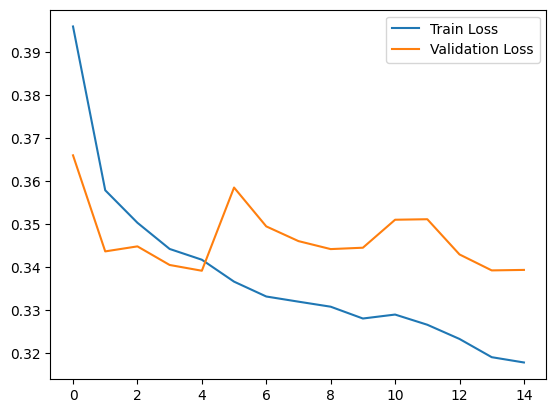

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
